# FEATURE SCALING
1)  NORAMLISATION
2) STANDARISATION

LINK:- https://www.youtube.com/watch?v=bqhQ2LWBheQ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [14]:
#DATA
a=[2206,2319,3000,1800]
df=pd.DataFrame(a,columns=['a'])
df

,a
0,2206
1,2319
2,3000
3,1800


In [10]:
# NORMALISATION ( USE WHEN THERE ARE NO OR LESS OUTLIERS )( SCALES DATA BETWEEN 0 AND 1 ) 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=['a'])
df1

,a
0,0.338333
1,0.432500
2,1.000000
3,0.000000


In [13]:
# STANDARDIZATION ( USE WHEN THERE ARE LOT OF OUTLIERS )( MAKES MEAN 0 AND STANDARD DEVIATION 1 )
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=pd.DataFrame(scaler.fit_transform(df),columns=['a'])
df2

,a
0,-0.290165
1,-0.028379
2,1.549284
3,-1.230739


# ENCODING

TYPES OF ENCODING ARE:-
1) One-hot encoding
2) Label encoding
3) Ordinal encoding
4) Count encoding
5) Target encoding
6) Leave-one-out encoding
7) Catboost encoding

LINK:- https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b



In [32]:
# 1) ONE-HOT ENCODING( USED FOR NOMINAL(UNORDERED) DATA)
import pandas as pd

# Sample dataset with a categorical column
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(df, columns=['Color'],dtype=int)

print("\nOne-Hot Encoded DataFrame:")
print(one_hot_encoded)

Original DataFrame:
   Color
0    Red
1   Blue
2  Green
3    Red
4  Green

One-Hot Encoded DataFrame:
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           1            0          0
2           0            1          0
3           0            0          1
4           0            1          0


In [31]:
#2 LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

# Sample dataset with a categorical column
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Size' column
df['Size_encoded'] = label_encoder.fit_transform(df['Size'])
df

Original DataFrame:
     Size
0   Small
1  Medium
2   Large
3  Medium
4   Small


,Size,Size_encoded
0,Small,2
1,Medium,1
2,Large,0
3,Medium,1
4,Small,2


In [6]:
#3 ORDINAL ENCODING ( we can encode data by our own order)
import pandas as pd
import category_encoders as ce

# Sample dataset with an ordinal categorical column
data = {'Education_Level': ['High School', 'Bachelor\'s', 'Master\'s', 'Bachelor\'s', 'High School']}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Define the order of categories
education_order = ['High School', 'Bachelor\'s', 'Master\'s']

# Initialize the OrdinalEncoder with specified order
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'Education_Level', 'mapping': {level: index for index, level in enumerate(education_order)}}])

# Fit and transform the DataFrame
df_encoded = ordinal_encoder.fit_transform(df)

# Display the DataFrame with ordinal encoding
print("\nOrdinal Encoded DataFrame:")
df_encoded

Original DataFrame:
  Education_Level
0     High School
1      Bachelor's
2        Master's
3      Bachelor's
4     High School

Ordinal Encoded DataFrame:


,Education_Level
0,0
1,1
2,2
3,1
4,0


In [5]:
# or we directly using sklearn
from sklearn.preprocessing import OrdinalEncoder
data = {'Education_Level': ['High School', 'Bachelor\'s', 'Master\'s', 'Bachelor\'s', 'High School']}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

encoder = OrdinalEncoder(categories=[['High School', 'Bachelor\'s', 'Master\'s']])
df['Education_Level'] = encoder.fit_transform(df[['Education_Level']])
print("\nEncoded DataFrame:")
print(df)


Original DataFrame:
  Education_Level
0     High School
1      Bachelor's
2        Master's
3      Bachelor's
4     High School

Encoded DataFrame:
   Education_Level
0              0.0
1              1.0
2              2.0
3              1.0
4              0.0


In [ ]:
# 4) COUNT ENCODING/ FREQUENCY ENCODING (replaces each category with its count or frequency)
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Generate a dummy dataset with categorical variables
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Red', 'Blue', 'Green'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Small', 'Medium'],
    'Label': [1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the CountEncoder
count_encoder = ce.CountEncoder()

# Fit the encoder on the training data
count_encoder.fit(train_df[['Color', 'Size']])

# Transform both the training and test datasets
train_encoded = count_encoder.transform(train_df[['Color', 'Size']])
test_encoded = count_encoder.transform(test_df[['Color', 'Size']])

# Display the encoded datasets
print("Training Data (After Count Encoding):\n", train_encoded)
print("\nTest Data (After Count Encoding):\n", test_encoded)


Original DataFrame:
   Color    Size  Label
0    Red   Small      1
1   Blue  Medium      0
2  Green   Large      1
3    Red  Medium      1
4    Red   Small      0
5   Blue   Small      0
6  Green  Medium      1
Training Data (After Count Encoding):
    Color  Size
5      1     2
2      2     1
4      2     2
3      2     2
6      2     2

Test Data (After Count Encoding):
    Color  Size
0      2     2
1      1     2


In [3]:
#5) TARGET ENCODING(MEAN ENCODING)(replaces each categorical feature with the mean of the target variable)
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Generate a dummy dataset with categorical variables
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Red', 'Blue', 'Green'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Small', 'Medium'],
    'Label': [1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the MeanEncoder
mean_encoder = ce.TargetEncoder()

# Fit the encoder on the training data
mean_encoder.fit(train_df[['Color', 'Size']], train_df['Label'])

# Transform both the training and test datasets
train_encoded = mean_encoder.transform(train_df[['Color', 'Size']])
test_encoded = mean_encoder.transform(test_df[['Color', 'Size']])

# Display the encoded datasets
print("Training Data (After Mean Encoding):\n", train_encoded)
print("\nTest Data (After Mean Encoding):\n", test_encoded)

Original DataFrame:
   Color    Size  Label
0    Red   Small      1
1   Blue  Medium      0
2  Green   Large      1
3    Red  Medium      1
4    Red   Small      0
5   Blue   Small      0
6  Green  Medium      1
Training Data (After Mean Encoding):
       Color      Size
5  0.521935  0.514889
2  0.656740  0.652043
4  0.585815  0.514889
3  0.585815  0.656740
6  0.656740  0.656740

Test Data (After Mean Encoding):
       Color      Size
0  0.585815  0.514889
1  0.521935  0.656740


In [5]:
#6) LEAVE ONE-OUT ENCODING (replaces each category with the mean of the target variable, leaving one observation out)
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset (replace this with your own dataset)
data = {
    'Category1': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Target': [1, 0, 1, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Specify categorical columns for LOO encoding
categorical_columns = ['Category1', 'Category2']

# Initialize LOO encoder
loo_encoder = ce.leave_one_out.LeaveOneOutEncoder(cols=categorical_columns)

# Fit and transform on the training data
train_encoded = loo_encoder.fit_transform(train_df, train_df['Target'])

# Transform the test data using the encoder fitted on the training data
test_encoded = loo_encoder.transform(test_df)

# Display the results
print("Encoded Training Data:")
print(train_encoded)

print("\nEncoded Test Data:")
print(test_encoded)

Original DataFrame:
  Category1 Category2  Target
0         A         X       1
1         B         Y       0
2         A         X       1
3         B         Y       0
4         A         X       1
5         A         Y       1
6         B         X       0
7         B         Y       0
Encoded Training Data:
   Category1  Category2  Target
0        1.0   0.666667       1
7        0.0   0.000000       0
2        1.0   0.666667       1
4        1.0   0.666667       1
3        0.0   0.000000       0
6        0.0   1.000000       0

Encoded Test Data:
   Category1  Category2  Target
1        0.0        0.0       0
5        1.0        0.0       1


In [7]:
# 7) CATBOOST ENCODING
import pandas as pd
from category_encoders.cat_boost import CatBoostEncoder

# Sample training and testing datasets with a categorical column
train_data = pd.DataFrame({'Category': ['A', 'B', 'C', 'A', 'B'], 'Target': [1, 0, 1, 0, 1]})
test_data = pd.DataFrame({'Category': ['A', 'C', 'B']})

# Initialize the CatBoostEncoder
catboost_encoder = CatBoostEncoder()

# Fit and transform the training data
train_encoded = catboost_encoder.fit_transform(train_data['Category'], train_data['Target'])

# Transform the testing data
test_encoded = catboost_encoder.transform(test_data['Category'])
print("Encoded Training Data:")
print(train_encoded)


Encoded Training Data:
   Category
0       0.6
1       0.6
2       0.6
3       0.8
4       0.3


# DATA IMPUTATION
Imputation is the process of replacing missing data with substituted values. Here are common imputation techniques:

## 1. Simple Imputer
- **Description:** Replaces missing values with a basic strategy: mean, median, most frequent, or a constant.
- **When to use:**
  - When your missing data is not too high.
  - Quick, low-complexity imputation.
- **Strategies:**
  - Numeric data → mean/median
  - Categorical data → most frequent

## 2. Iterative Imputer
- **Description:** Predicts missing values using other features in the dataset, running a regression (or classification) multiple times until convergence.
- **When to use:**
  - When features have relationships with each other.
  - Works better for complex missing patterns.
  - Slower but more accurate than SimpleImputer.

## 3. KNN Imputer
- **Description:** Fills missing values using the average (or weighted average) of the k nearest neighbors.
- **When to use:**
  - When features have strong correlations.
  - Works well for datasets with patterns.
  - More computation-heavy for large datasets.

## 4. Constant / Custom Value Imputation
- **Description:** Set `strategy='constant'` and specify `fill_value` to use a custom value for missing data.
- **When to use:**
  - For categorical placeholders (e.g., "Unknown").
  - When you want to explicitly mark missing values.

## 5. Using Pandas in a Scikit-Learn Pipeline
- **Description:** Combine imputation with preprocessing and modeling in a pipeline for streamlined workflows.





In [ ]:
# SIMPLE IMPUTER
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Age': [25, np.nan, 30, 22, np.nan],
    'Salary': [50000, 54000, np.nan, 58000, 60000],
    'Department': ['IT', 'HR', np.nan, 'Finance', 'IT']
})
print(" original data:")
print(data) 

# 1A. Mean imputation for numeric
mean_imputer = SimpleImputer(strategy='mean')
data['Age'] = mean_imputer.fit_transform(data[['Age']])

# 1B. Median imputation for numeric
median_imputer = SimpleImputer(strategy='median')
data['Salary'] = median_imputer.fit_transform(data[['Salary']])

# 1C. Most frequent imputation for categorical
freq_imputer = SimpleImputer(strategy='most_frequent')
data['Department'] = freq_imputer.fit_transform(data[['Department']]).ravel()

print("")
print(" imputed data:")
print(data)



 original data:
    Age   Salary Department
0  25.0  50000.0         IT
1   NaN  54000.0         HR
2  30.0      NaN        NaN
3  22.0  58000.0    Finance
4   NaN  60000.0         IT

 imputed data:
         Age   Salary Department
0  25.000000  50000.0         IT
1  25.666667  54000.0         HR
2  30.000000  56000.0         IT
3  22.000000  58000.0    Finance
4  25.666667  60000.0         IT


In [6]:
# 2) ITERATIVE IMPUTER
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = pd.DataFrame({
    'Age': [25, np.nan, 30, 22, np.nan],
    'Salary': [50000, 54000, np.nan, 58000, 60000],
    'Experience': [1, 3, 5, np.nan, 2]
})
print(" original data:")
print(data)

iter_imputer = IterativeImputer()
data_imputed = pd.DataFrame(iter_imputer.fit_transform(data), columns=data.columns)

print(" imputed data:")
print(data_imputed)

 original data:
    Age   Salary  Experience
0  25.0  50000.0         1.0
1   NaN  54000.0         3.0
2  30.0      NaN         5.0
3  22.0  58000.0         NaN
4   NaN  60000.0         2.0
 imputed data:
         Age        Salary  Experience
0  25.000000  50000.000000     1.00000
1  27.150853  54000.000000     3.00000
2  30.000000  55499.999252     5.00000
3  22.000000  58000.000000     0.53156
4  23.840887  60000.000000     2.00000


In [7]:
# 3) KNN IMPUTER
from sklearn.impute import KNNImputer

data = pd.DataFrame({
    'Age': [25, np.nan, 30, 22, np.nan],
    'Salary': [50000, 54000, np.nan, 58000, 60000]
})
print(" original data:")
print(data)

knn_imputer = KNNImputer(n_neighbors=2)
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

print(" imputed data:")
print(data_imputed)


 original data:
    Age   Salary
0  25.0  50000.0
1   NaN  54000.0
2  30.0      NaN
3  22.0  58000.0
4   NaN  60000.0
 imputed data:
    Age   Salary
0  25.0  50000.0
1  23.5  54000.0
2  30.0  54000.0
3  22.0  58000.0
4  23.5  60000.0


In [8]:
# 4) CONSTANT/CUSTOM VALUE IMPUTATION
const_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

data = pd.DataFrame({
    'Name': ['John', np.nan, 'Sara'],
    'City': ['NY', np.nan, 'LA']
})

data_imputed = pd.DataFrame(const_imputer.fit_transform(data), columns=data.columns)
print(" imputed data:")
print(data_imputed)

 imputed data:
      Name     City
0     John       NY
1  Unknown  Unknown
2     Sara       LA


# Main Categories of Feature Selection

Feature selection methods are generally classified into three categories:

## 1. Filter Methods

- **Description:** Select features independently of any ML model using statistical measures.
- **When to use:**
  - Large datasets with many irrelevant features
  - Before trying heavy algorithms
  - Fast preprocessing

- **Common Filter Methods:**
  - **a) Variance Threshold:** Removes features with low variance (almost constant).
  - **b) Correlation with Target (SelectKBest, SelectPercentile):** Uses statistical tests:
    - `f_classif` → ANOVA F-test (classification)
    - `chi2` → Chi-square (classification, non-negative features)
    - `f_regression` → F-test for regression
  - **c) Mutual Information:** Captures non-linear relationships.

## 2. Wrapper Methods

- **Description:** Train a model using different subsets of features and keep the best ones. Slower but often more accurate.
- **When to use:**
  - Small/medium datasets
  - When computation time is not a big issue

- **Common Wrapper Methods:**
  - **a) Recursive Feature Elimination (RFE):** Recursively removes least important features based on a model.
  - **b) Sequential Feature Selection (SFS):** Adds or removes features one by one until performance stops improving.

## 3. Embedded Methods

- **Description:** Feature selection happens during model training based on feature importance.
- **When to use:**
  - You want selection and training in one step
  - You’re using models that naturally provide importance scores

- **Common Embedded Methods:**
  - **a) L1 Regularization (Lasso):** Shrinks less important feature weights to zero.
  - **b) Tree-based Feature Importance:** Decision trees, RandomForest, XGBoost, etc. give feature importance scores.
  - **c) Elastic Net:** Mixes L1 and L2 regularization to remove irrelevant features.

#### 1). FILTER METHODS

In [13]:

#a) Variance Threshold
from sklearn.feature_selection import VarianceThreshold
import numpy as np

X = np.array([[0, 2, 0, 3],
              [0, 1, 4, 3],
              [0, 1, 1, 3]])
print(" original data:")
print(X)

sel = VarianceThreshold(threshold=0.0)
X_new = sel.fit_transform(X)
print(" transformed data:")
print(X_new)


 original data:
[[0 2 0 3]
 [0 1 4 3]
 [0 1 1 3]]
 transformed data:
[[2 0]
 [1 4]
 [1 1]]


In [16]:
#b) Correlation with target
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(" original data:")
print(X[:5])
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
print(" transformed data:")
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [18]:
# c) Mutual Information
from sklearn.feature_selection import mutual_info_classif, SelectKBest
X, y = load_iris(return_X_y=True)
selector = SelectKBest(mutual_info_classif, k=2)
X_new = selector.fit_transform(X, y)
print(" original data:")
print(X[:5])
print(" transformed data:")
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


#### 2). Wrapper Methods

In [20]:
#a) Recursive Feature Elimination(RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
print(" original data:")
print(X[:5])
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [21]:
#b) Sequential Feature Selection(SFS)
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')
X_new = sfs.fit_transform(X, y)
print(" original data:")
print(X[:5])
print(" transformed data:")
print(X_new[:5])
    

 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


#### 3). Embedded Methods

In [22]:
# a L1 regularization (Lasso)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)
print(" original data:")
print(X[:5])
print(" transformed data:")
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


In [25]:
# b Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier()
rf.fit(X, y)
model = SelectFromModel(rf, prefit=True, threshold="median")
X_new = model.transform(X)
print(" original data:")
print(X[:5])
print(" transformed data:")
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [27]:
# c Elastic Net
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X, y)
model = SelectFromModel(enet, prefit=True)
X_new = model.transform(X)
print(" original data:")
print(X[:5])
print(" transformed data:")
print(X_new[:5])


 original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
 transformed data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


# Handling Missing Values in Machine Learning

## Overview

Handling missing values is a crucial part of data preprocessing. Missing data can reduce the predictive power of models and introduce bias. This guide covers types of missing data, how to detect and visualize them, and various strategies for handling them.

## Table of Contents

1. Why is it important to handle missing data?

2. Reasons behind Missing Values

3. Types of Missing Values

   - Missing Completely at Random (MCAR)

   - Missing At Random (MAR)

   - Not Missing at Random (NMAR)

4. Checking for Missing Values

5. Visualizing Missing Values

6. Handling Missing Values

   - Dropping rows/columns

   - Imputation for continuous variables

   - Imputation for categorical variables

   - Predicting missing values

   - Handling missing values in time series

7. Algorithms robust to missing values

8. Conclusion


---

## 1. Why is it important to handle missing data?

- Missing data can bias model results and reduce predictive power.
- Algorithms may not work properly with missing values.
- Proper handling ensures reliable and accurate analysis.

## 2. Reasons behind Missing Values

- Non-response in surveys (e.g., sensitive questions)

- Data corruption or loss during collection/storage

- Human error in data entry

- Equipment inconsistencies

## 3. Types of Missing Values

- **Missing Completely at Random (MCAR):** Missingness is unrelated to any variable. Rare and ideal case.
- **Missing At Random (MAR):** Missingness depends on observed data (e.g., older people less likely to answer certain questions).
- **Not Missing at Random (NMAR):** Missingness depends on unobserved data (e.g., people with high social media use not reporting it).

## 4. Checking for Missing Values

```python
import pandas as pd
train = pd.read_csv('train.csv')
missing_values = train.isnull().sum()
print(missing_values)
# Percentage of missing values
mis_value_percent = 100 * train.isnull().sum() / len(train)
print(mis_value_percent)
```

## 5. Visualizing Missing Values
- Use the `missingno` library for bar charts, matrix, and heatmap visualizations.

```python
import missingno as msno
msno.bar(train)
msno.matrix(train)
msno.heatmap(train)
```

## 6. Handling Missing Values
### a) Dropping Rows/Columns
- Drop rows if only a few values are missing:
```python
train.dropna(subset=['Embarked'], how='any', inplace=True)
```
- Drop columns if a large percentage is missing:
```python
train.drop('Cabin', axis=1, inplace=True)
```

### b) Imputation for Continuous Variables
- **Mean Imputation:**
```python
train['Age'] = train['Age'].replace(np.NaN, train['Age'].mean())
```
- **Median Imputation:**
```python
train['Age'] = train['Age'].replace(np.NaN, train['Age'].median())
```

### c) Predicting Missing Values with Regression
```python
from sklearn.linear_model import LinearRegression
# Prepare data as shown in the guide, then:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

### d) Imputation for Categorical Variables
- **Mode Imputation:**
```python
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].value_counts().index[0])
```
- **New Category for Missing:**
```python
train['Cabin'] = train['Cabin'].fillna('Unknown')
```

### e) Handling Missing Values in Time Series
- **Forward Fill:**
```python
df.fillna(method='ffill')
```
- **Backward Fill:**
```python
df.fillna(method='bfill')
```
- **Linear Interpolation:**
```python
df.interpolate(limit_direction='both')
```

## 7. Algorithms Robust to Missing Values
- KNN (K Nearest Neighbors)
- Random Forest, Decision Trees
- XGBoost, CatBoost

## 8. Conclusion
- Always explore and quantify missing data before deciding on a strategy.
- Choose the method based on the type, amount, and importance of missing data.
- Proper handling of missing values is essential for reliable machine learning models.

Age         1
Cabin       7
Embarked    1
dtype: int64
Age         10.0
Cabin       70.0
Embarked    10.0
dtype: float64
Before: 10
After: 9
Missing Embarked: 0
Columns before: ['Age', 'Cabin', 'Embarked']
Columns after: ['Age', 'Embarked']
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    28.111111
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    27.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
0     C85
1     C85
2     C85
3    C123
4     C85
5     C85
6     E46
7     C85
8     C85
9     C85
Name: Cabin, dtype: object
0        C85
1    Unknown
2    Unknown
3       C123
4    Unknown
5    Unknown
6        E46
7    Unknown
8    Unknown
9    Unknown
Name: Cabin, dtype: object
Original:
            Units sold
2021-01-03         5.0
2021-01-10         4.0
2021-01-17         NaN
2021-01-24         NaN
2021-01-31         1.0
2021-02-07         NaN
20

C:\Users\admin\AppData\Local\Temp\ipykernel_56112\694131092.py:135: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method='ffill'))
C:\Users\admin\AppData\Local\Temp\ipykernel_56112\694131092.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method='bfill'))


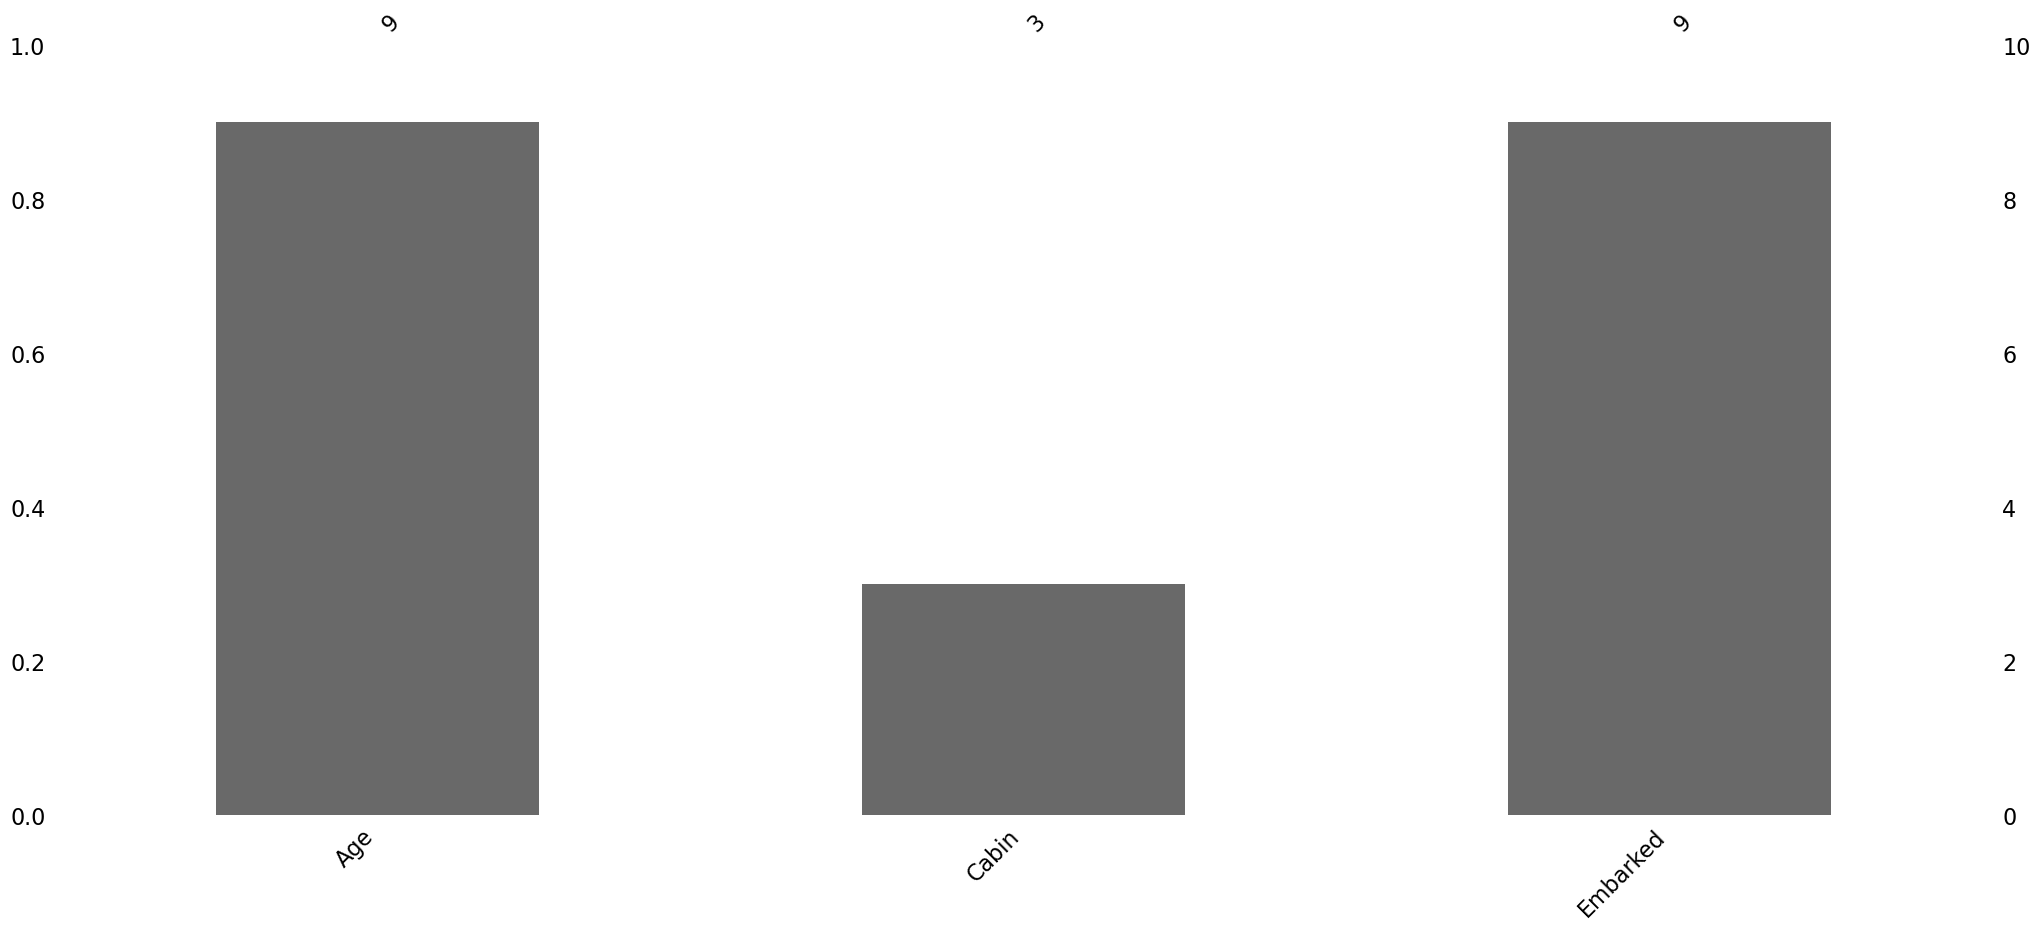

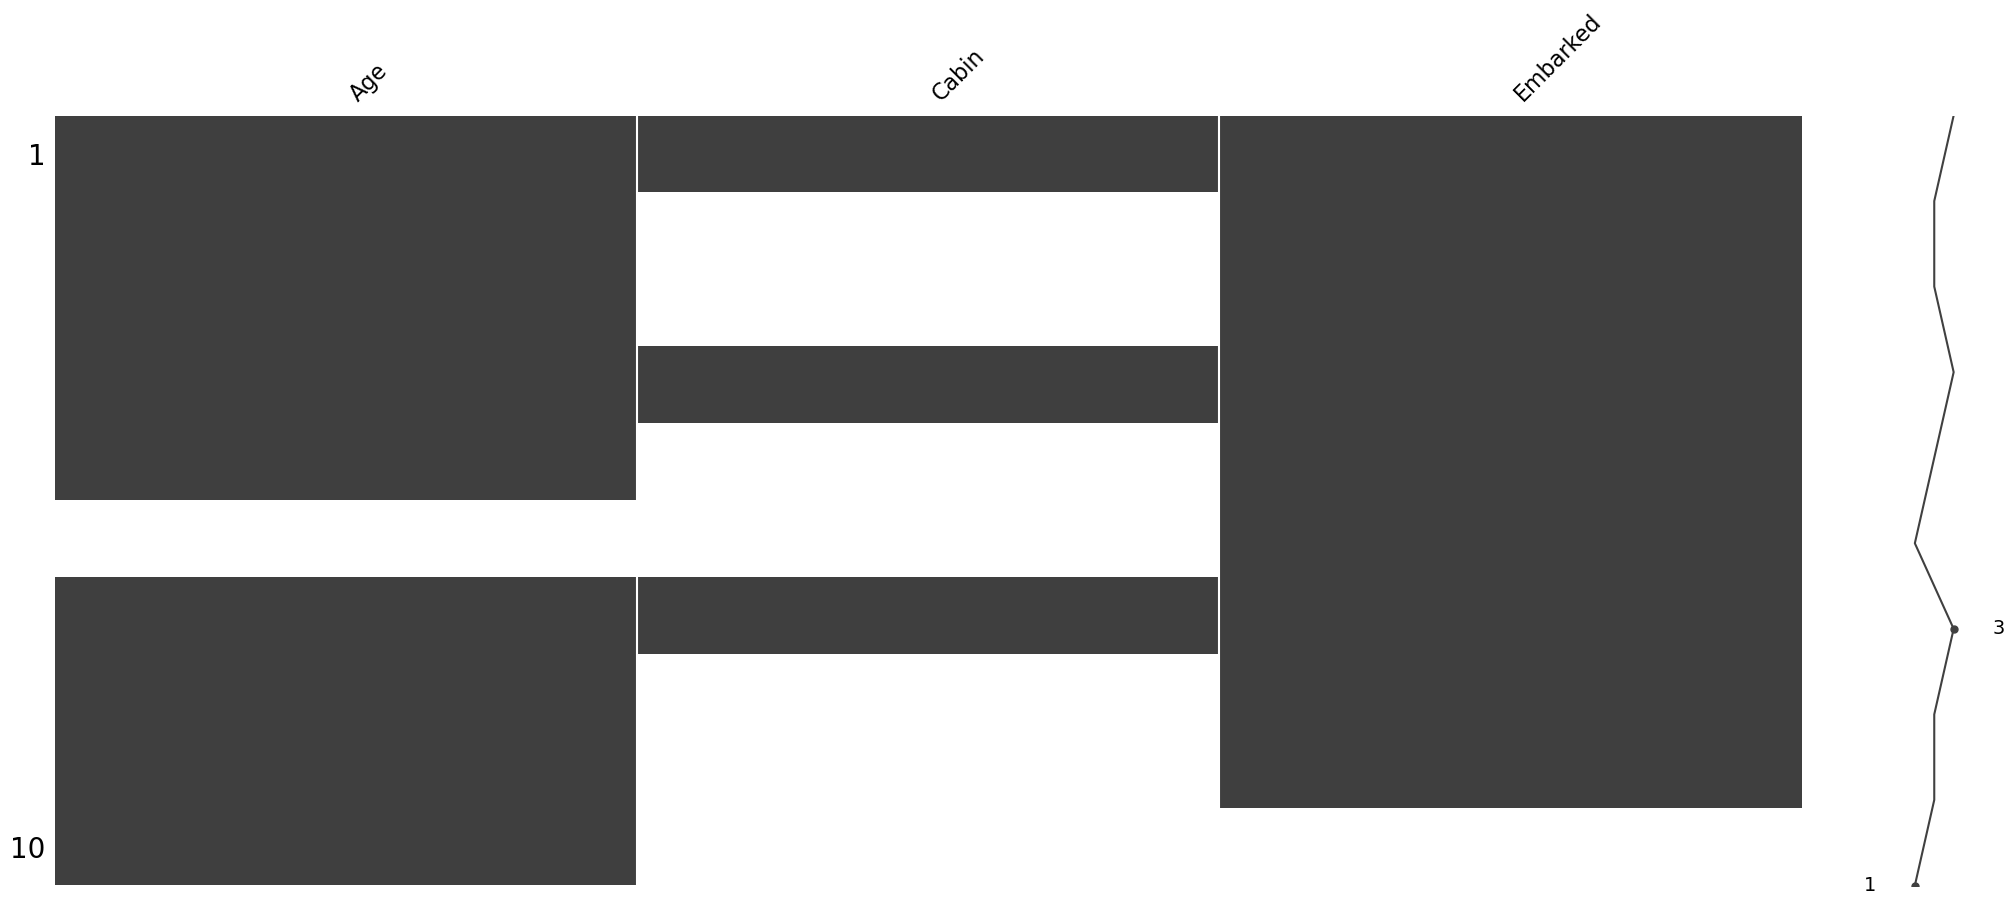

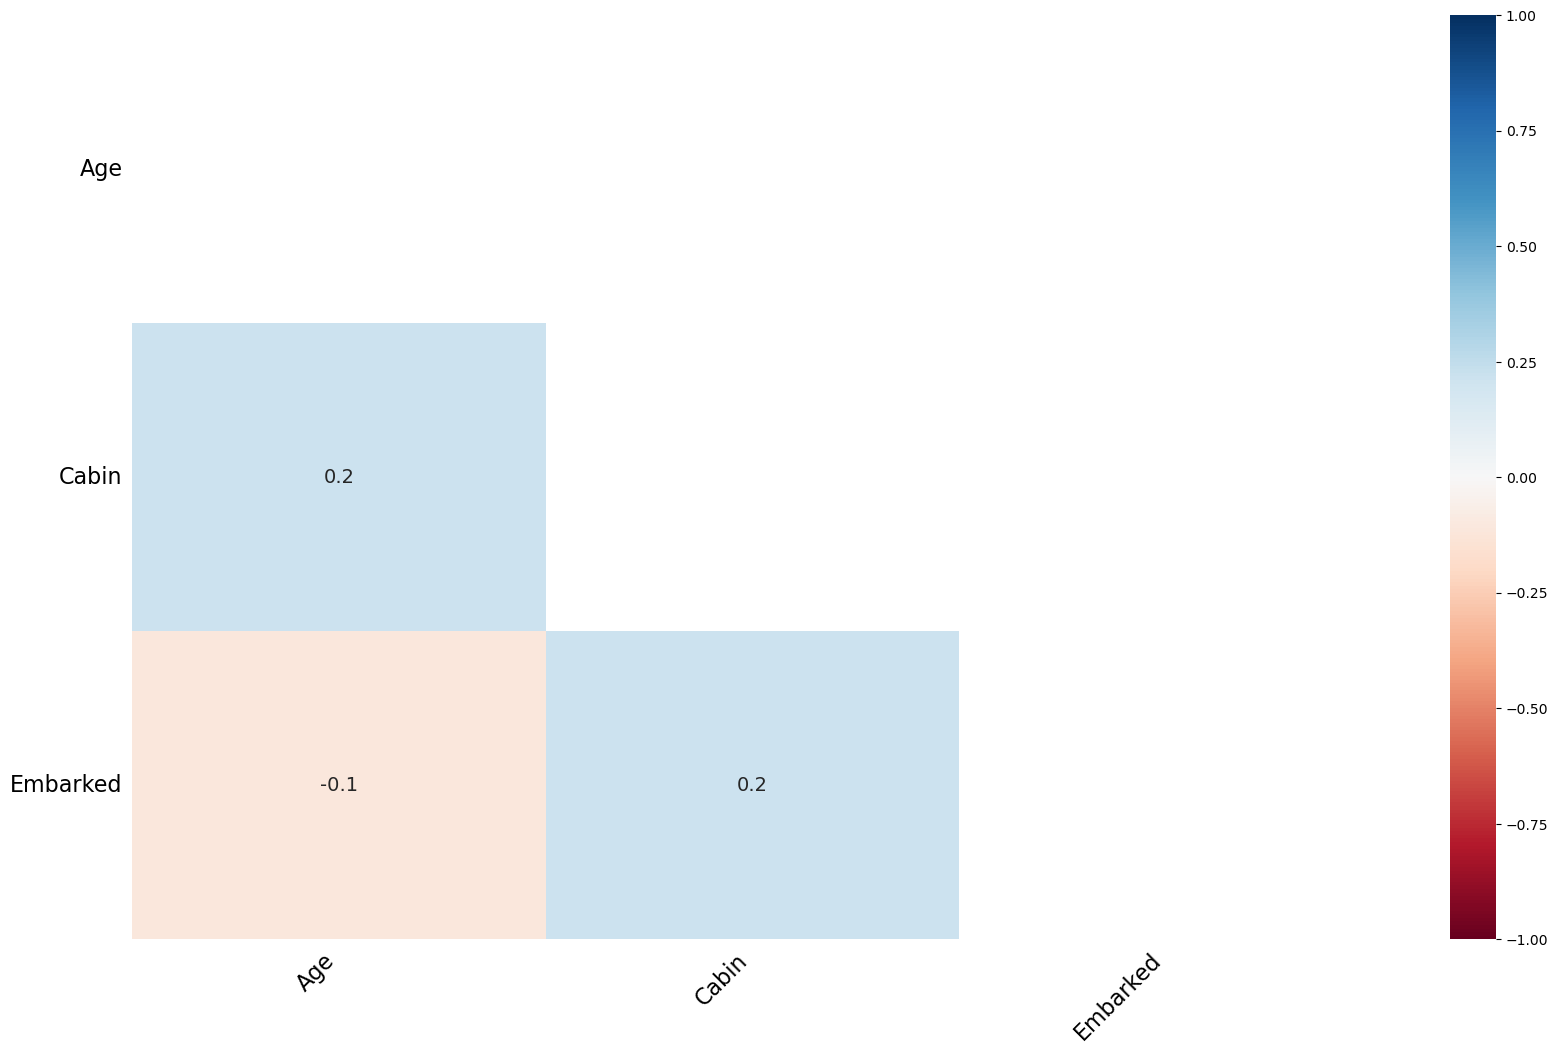

In [1]:
# 1. Checking for Missing Values
import pandas as pd
import numpy as np
train = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, np.nan, 54, 2, 27, 14],
    'Cabin': ['C85', np.nan, np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, np.nan, np.nan],
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', np.nan]
})
missing_values = train.isnull().sum()
print(missing_values)
# Output:
# Age         1
# Cabin       7
# Embarked    1
# dtype: int64

mis_value_percent = 100 * train.isnull().sum() / len(train)
print(mis_value_percent)
# Output:
# Age         10.0
# Cabin       70.0
# Embarked    10.0
# dtype: float64


# 2. Visualizing Missing Values
import missingno as msno
msno.bar(train)
msno.matrix(train)
msno.heatmap(train)
# Output: (Plots will be shown in notebook output)


# 3. Dropping Rows with Missing Values
print('Before:', len(train))
train_drop = train.dropna(subset=['Embarked'], how='any')
print('After:', len(train_drop))
print('Missing Embarked:', train_drop['Embarked'].isnull().sum())
# Output:
# Before: 10
# After: 9
# Missing Embarked: 0


# 4. Dropping Columns with Many Missing Values
print('Columns before:', train.columns.tolist())
train_col_drop = train.drop('Cabin', axis=1)
print('Columns after:', train_col_drop.columns.tolist())
# Output:
# Columns before: ['Age', 'Cabin', 'Embarked']
# Columns after: ['Age', 'Embarked']


# 5. Imputation for Continuous Variables (Mean)
train_mean = train.copy()
mean_age = train_mean['Age'].mean()
train_mean['Age'] = train_mean['Age'].replace(np.NaN, mean_age)
print(train_mean['Age'])
# Output:
# 0    22.0
# 1    38.0
# 2    26.0
# 3    35.0
# 4    35.0
# 5    27.0  # mean value
# 6    54.0
# 7     2.0
# 8    27.0
# 9    14.0


# 6. Imputation for Continuous Variables (Median)
train_median = train.copy()
median_age = train_median['Age'].median()
train_median['Age'] = train_median['Age'].replace(np.NaN, median_age)
print(train_median['Age'])
# Output:
# 0    22.0
# 1    38.0
# 2    26.0
# 3    35.0
# 4    35.0
# 5    27.0  # median value
# 6    54.0
# 7     2.0
# 8    27.0
# 9    14.0


# 7. Imputation for Categorical Variables (Mode)
train_mode = train.copy()
mode_cabin = train_mode['Cabin'].value_counts().index[0]
train_mode['Cabin'] = train_mode['Cabin'].fillna(mode_cabin)
print(train_mode['Cabin'])
# Output:
# 0     C85
# 1     C85
# 2     C85
# 3    C123
# 4     C85
# 5     C85
# 6     E46
# 7     C85
# 8     C85
# 9     C85


# 8. Imputation for Categorical Variables (New Category)
train_newcat = train.copy()
train_newcat['Cabin'] = train_newcat['Cabin'].fillna('Unknown')
print(train_newcat['Cabin'])
# Output:
# 0       C85
# 1    Unknown
# 2    Unknown
# 3      C123
# 4    Unknown
# 5    Unknown
# 6       E46
# 7    Unknown
# 8    Unknown
# 9    Unknown


# 9. Handling Missing Values in Time Series
import pandas as pd
import numpy as np
time = pd.date_range("1/01/2021", periods=10, freq="W")
df = pd.DataFrame(index=time)
df["Units sold"] = [5.0,4.0,np.nan,np.nan,1.0,np.nan,3.0,6.0,np.nan,2.0]
print('Original:')
print(df)
# Forward fill
print('Forward fill:')
print(df.fillna(method='ffill'))
# Backward fill
print('Backward fill:')
print(df.fillna(method='bfill'))
# Linear interpolation
print('Linear interpolation:')
print(df.interpolate(limit_direction="both"))
# Output: (Shows each imputation method for time series)


# OUTLIERS
| Method             | Assumption        | Works well for    | Weakness                       |
| ------------------ | ----------------- | ----------------- | ------------------------------ |
| IsolationForest    | None              | Large/high-d data | Randomness; tune contamination |
| LOF                | Local density     | Clusters          | Struggles in high dimensions   |
| EllipticEnvelope   | Gaussian          | Elliptical data   | Bad for non-Gaussian           |
| One-Class SVM      | Flexible boundary | Novelty detection | Sensitive to parameters        |
| **Z-score**        | Normality         | Univariate, normal| Not robust to skew/outliers    |
| **IQR Capping**    | None              | Univariate        | Only caps, doesn't remove      |

### Detect Outliers


#### 1) Isolation Forest

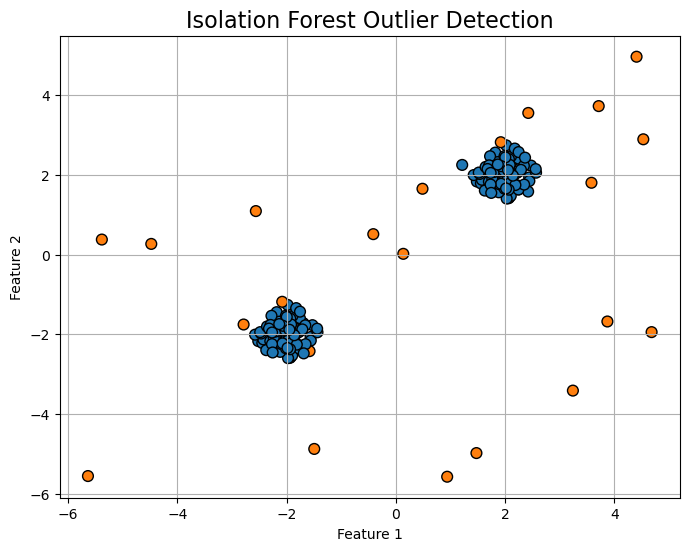

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create data
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)  # Cluster 1
X_normal = np.r_[X_normal + 2, X_normal - 2]  # Two clusters

X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))  # Random scattered points

X = np.r_[X_normal, X_outliers]

# Fit Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso.fit_predict(X)

# +1 = normal, -1 = outlier
colors = np.array(['#1f77b4' if label == 1 else '#ff7f0e' for label in y_pred])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=60)
plt.title("Isolation Forest Outlier Detection", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


#### Local Outlier Factor (LOF)

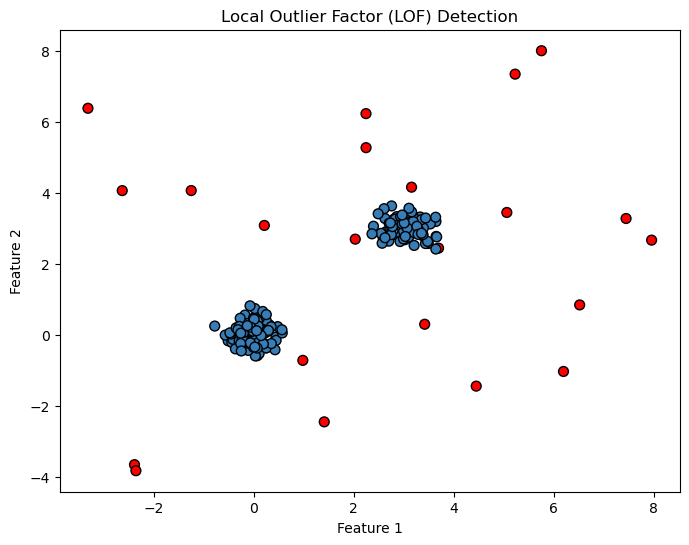

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Create synthetic data
rng = np.random.RandomState(42)
X_inliers = 0.3 * rng.randn(100, 2)  # Cluster 1
X_inliers2 = 0.3 * rng.randn(100, 2) + np.array([3, 3])  # Cluster 2
X_outliers = rng.uniform(low=-4, high=8, size=(20, 2))  # Random outliers

# Combine data
X = np.vstack([X_inliers, X_inliers2, X_outliers])

# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# -1 = outlier, 1 = inlier
colors = np.array(['#377eb8' if label == 1 else '#ff0000' for label in y_pred])

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=50)
plt.title("Local Outlier Factor (LOF) Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### 3) EllipticEnvelope

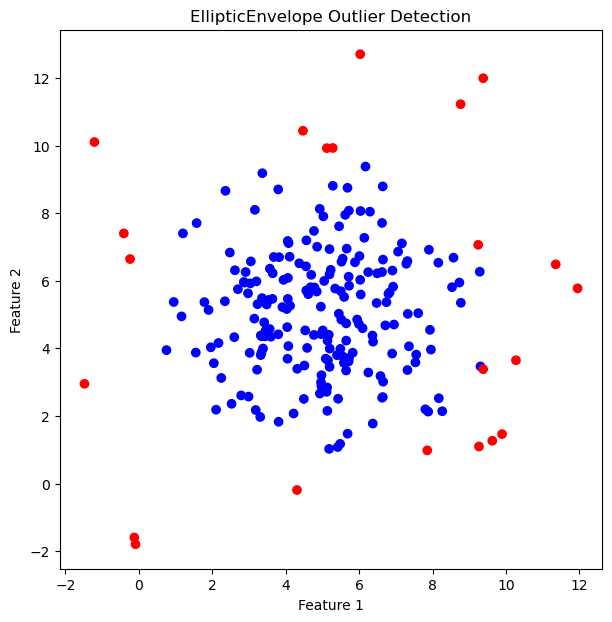

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Create sample data
rng = np.random.RandomState(42)
X = rng.randn(200, 2) * 2 + np.array([5, 5])  # Normal data
X_outliers = rng.uniform(low=-2, high=12, size=(20, 2))  # Random outliers
X_total = np.vstack([X, X_outliers])

# Fit EllipticEnvelope
envelope = EllipticEnvelope(contamination=0.1)
envelope.fit(X_total)
y_pred = envelope.predict(X_total)

# Plot
plt.figure(figsize=(7,7))
plt.scatter(X_total[:,0], X_total[:,1], c=['blue' if y==1 else 'red' for y in y_pred])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("EllipticEnvelope Outlier Detection")
plt.show()


#### 4) One-Class SVM

Normal points detected: 188
Outliers detected: 18


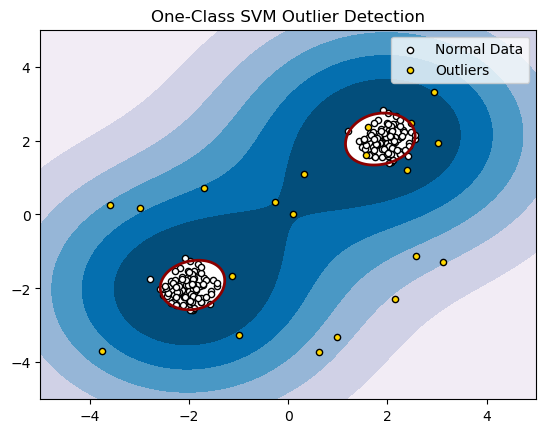

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Create synthetic data
rng = np.random.RandomState(42)
X_train = 0.3 * rng.randn(100, 2)  # Normal data
X_train = np.r_[X_train + 2, X_train - 2]  # Shifted clusters

X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))  # Outliers

# Train One-Class SVM
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

# Predictions (-1 = outlier, 1 = normal)
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

print("Normal points detected:", list(y_pred_train).count(1))
print("Outliers detected:", list(y_pred_outliers).count(-1))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 500),
                     np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One-Class SVM Outlier Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# Plot points
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Normal Data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=20, edgecolor='k', label="Outliers")
plt.legend()
plt.show()


1️⃣ Remove Outliers (Drop Them)
This is the most common approach when:

Outliers are due to errors or noise (e.g., wrong data entry).

The dataset is large enough that losing some rows won’t hurt.

Example (removing detected outliers):

2️⃣ Fix Outliers (Cap or Transform Them)
Sometimes you can’t just remove data (e.g., small dataset, outliers are extreme but valid).
Instead, you replace them using:

Capping (Winsorizing) → Replace extreme values with nearest acceptable value.

Transformation → Apply log/sqrt to reduce effect.

Imputation → Replace with mean/median.

#### 5). IQR

#### IQR Method
- **Description:** Identifies outliers based on the spread of the middle 50% of the data (the interquartile range).
- **How to determine if a number is an outlier:**
  1. Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data.
  2. Compute the IQR: **IQR = Q3 - Q1**
  3. Define lower and upper bounds:
     - Lower bound = Q1 - 1.5 × IQR
     - Upper bound = Q3 + 1.5 × IQR
  4. Any value below the lower bound or above the upper bound is considered an outlier.
- **Example:**
  - If Q1 = 10, Q3 = 20, IQR = 10
  - Lower bound = 10 - 1.5×10 = -5
  - Upper bound = 20 + 1.5×10 = 35
  - Any value < -5 or > 35 is an outlier

**Interpretation:**
- The IQR method is robust to skewed data and is commonly used for boxplot-based outlier detection.
- Outliers are values that fall far outside the central bulk of the data.

In [ ]:
# CAPPING
import numpy as np

# Define caps based on IQR
Q1 = df['feature1'].quantile(0.25)
Q3 = df['feature1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['feature1'] = np.where(df['feature1'] < lower_bound, lower_bound,
                          np.where(df['feature1'] > upper_bound, upper_bound, df['feature1']))


#### 6). Z-Score

#### Outlier Detection and Capping

#### Z-Score Method
- **Description:** Identifies outliers by measuring how many standard deviations a value is from the mean.
- **How to determine if a number is an outlier:**
  1. Calculate the mean and standard deviation of the data.
  2. Compute the z-score for each value:  
     **z = (value - mean) / standard deviation**
  3. If the absolute value of the z-score (|z|) is greater than a threshold (commonly 3 or 1), the number is considered an outlier.
- **Example:**
  - If z = 3.2, then |3.2| > 3 → outlier
  - If z = -2.5, then |-2.5| < 3 → not an outlier

**Interpretation:**
- A z-score tells you how many standard deviations a value is from the mean.
- The further away from 0, the more unusual the value is.
- Typically, |z| > 3 is considered an outlier in most practical scenarios.


In [4]:
# Z-score Outlier Detection Example (Basic Statistics)
import pandas as pd
outlier_data = pd.DataFrame({'value': [10, 12, 12, 13, 12, 11, 14, 100]})
mean = outlier_data['value'].mean()
std = outlier_data['value'].std()
outlier_data['zscore'] = (outlier_data['value'] - mean) / std
outlier_data['is_outlier'] = (outlier_data['zscore'].abs() > 1)
print("\nZ-score outlier detection (basic statistics):")
print(outlier_data)



Z-score outlier detection (basic statistics):
   value    zscore  is_outlier
0     10 -0.417528       False
1     12 -0.353293       False
2     12 -0.353293       False
3     13 -0.321175       False
4     12 -0.353293       False
5     11 -0.385410       False
6     14 -0.289058       False
7    100  2.473050        True


# Imbalanced Data in Machine Learning

## 1. What is Imbalanced Data?
Imbalanced data occurs when the distribution of classes is not uniform in the target variable.

**Example:**
- Fraud: 2%
- Not Fraud: 98%

ML models tend to be biased toward the majority class in such cases.
## 2. Why It’s a Problem?
- The model may achieve high accuracy but fail to correctly classify the minority class.
- Example: If 98% are "Not Fraud", a naive model predicting "Not Fraud" always will have 98% accuracy but 0% recall for fraud cases.
## 3. Metrics for Imbalanced Data
When data is imbalanced, accuracy is misleading. Use:
- Precision (Positive Predictive Value)
- Recall (Sensitivity, True Positive Rate)
- F1-Score
- ROC-AUC
- PR-AUC (Precision-Recall Area Under Curve)

# 4. Approaches to Handle Imbalanced Data

## A. Data-Level Methods (Resampling)
- Undersampling (reduce majority class)
- Oversampling (increase minority class)
- Hybrid Sampling (mix of over + under sampling)

## B. Algorithm-Level Methods
- Adjust class weights in model training (e.g., `class_weight='balanced'` in sklearn).
- Use algorithms designed for imbalance (e.g., Balanced Random Forest, EasyEnsemble).

# 5. Types of Sampling Techniques

## A. Undersampling
### Random Undersampling
Randomly removes samples from majority class. ❌ May lose important information.
```python
from imblearn.under_sampling import RandomUnderSampler
X_res, y_res = RandomUnderSampler(random_state=42).fit_resample(X, y)
```

### Tomek Links
Removes borderline majority class examples near minority samples. Good for cleaning overlap.
```python
from imblearn.under_sampling import TomekLinks
X_res, y_res = TomekLinks().fit_resample(X, y)
```

### Cluster Centroids
Uses KMeans to reduce majority samples while keeping diversity.
```python
from imblearn.under_sampling import ClusterCentroids
X_res, y_res = ClusterCentroids(random_state=42).fit_resample(X, y)
```

## B. Oversampling
### Random Oversampling
Randomly duplicates minority samples. ❌ Risk of overfitting.
```python
from imblearn.over_sampling import RandomOverSampler
X_res, y_res = RandomOverSampler(random_state=42).fit_resample(X, y)
```

### SMOTE (Synthetic Minority Over-sampling Technique)
Creates synthetic points between existing minority samples.
```python
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
```

### Borderline-SMOTE
SMOTE but only generates samples near the decision boundary.
```python
from imblearn.over_sampling import BorderlineSMOTE
X_res, y_res = BorderlineSMOTE(random_state=42).fit_resample(X, y)
```

### ADASYN (Adaptive Synthetic)
Creates more samples for harder-to-learn minority points.
```python
from imblearn.over_sampling import ADASYN
X_res, y_res = ADASYN(random_state=42).fit_resample(X, y)
```

## C. Hybrid Sampling
### SMOTE + Tomek Links
Creates synthetic data & removes borderline majority samples.
```python
from imblearn.combine import SMOTETomek
X_res, y_res = SMOTETomek(random_state=42).fit_resample(X, y)
```

### SMOTE + Edited Nearest Neighbors (ENN)
Oversampling + cleaning noisy data.
```python
from imblearn.combine import SMOTEENN
X_res, y_res = SMOTEENN(random_state=42).fit_resample(X, y)
```

# 6. Class Weight Method
Instead of resampling, give higher weight to minority class.
```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
```

# 7. Visualization of Class Imbalance
```python
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()
```

# ✅ Key Takeaways
- Always check metrics beyond accuracy.
- Try class weights before resampling to avoid overfitting.
- Use hybrid methods for better balance.
- Test multiple techniques and compare ROC-AUC, Precision, Recall, F1.


| **Technique Type**                 | **Method**                                             | **Description**                                                                                           | **Advantages**                                            | **Disadvantages**                             | **Example (Python / sklearn / imblearn)** |
| ---------------------------------- | ------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- | --------------------------------------------------------- | --------------------------------------------- | ----------------------------------------- |
| **Undersampling**                  | **Random Undersampling (RUS)**                         | Randomly removes samples from the majority class until balance is achieved.                               | Simple, fast, reduces dataset size.                       | Loss of useful majority class data.           | `RandomUnderSampler()`                    |
|                                    | **Tomek Links**                                        | Removes overlapping samples between classes by identifying nearest neighbor pairs from different classes. | Reduces class overlap, cleaner boundaries.                | Might remove useful borderline samples.       | `TomekLinks()`                            |
|                                    | **NearMiss**                                           | Selects majority samples closest to minority samples based on distance.                                   | Improves class separation.                                | Computationally expensive for large datasets. | `NearMiss()`                              |
|                                    | **Edited Nearest Neighbors (ENN)**                     | Removes samples whose class label differs from the majority of its k-nearest neighbors.                   | Cleans noisy data.                                        | Risk of removing borderline but valid points. | `EditedNearestNeighbours()`               |
|                                    | **One-Sided Selection (OSS)**                          | Combines Tomek Links removal + ENN to clean majority class.                                               | Improves classifier performance.                          | May remove too many samples.                  | `OneSidedSelection()`                     |
|                                    | **Cluster Centroids**                                  | Uses clustering (e.g., KMeans) to reduce majority class samples by replacing them with cluster centroids. | Preserves key distribution patterns.                      | Information loss due to averaging.            | `ClusterCentroids()`                      |
| **Oversampling**                   | **Random Oversampling (ROS)**                          | Randomly duplicates minority class samples.                                                               | Simple, balances quickly.                                 | Overfitting due to duplicates.                | `RandomOverSampler()`                     |
|                                    | **SMOTE (Synthetic Minority Over-sampling Technique)** | Generates synthetic samples between existing minority samples using interpolation.                        | Reduces overfitting risk, better minority representation. | May create overlapping classes.               | `SMOTE()`                                 |
|                                    | **Borderline-SMOTE**                                   | Generates synthetic data only near decision boundaries.                                                   | Focuses on hard-to-classify samples.                      | May amplify borderline noise.                 | `BorderlineSMOTE()`                       |
|                                    | **SVMSMOTE**                                           | Uses Support Vector Machines to find minority support vectors & create synthetic samples.                 | Works well for complex boundaries.                        | Slow for large datasets.                      | `SVMSMOTE()`                              |
|                                    | **ADASYN (Adaptive Synthetic Sampling)**               | Similar to SMOTE but focuses more on minority samples harder to learn.                                    | Improves learning for difficult cases.                    | Can create noisy synthetic samples.           | `ADASYN()`                                |
| **Hybrid (Over + Under Sampling)** | **SMOTE + Tomek Links**                                | SMOTE for oversampling minority, then Tomek Links to remove class overlap.                                | Improves decision boundaries.                             | Higher computation cost.                      | `SMOTETomek()`                            |
|                                    | **SMOTE + ENN**                                        | SMOTE oversampling + Edited Nearest Neighbors undersampling.                                              | Creates synthetic data & cleans noise.                    | Computationally expensive.                    | `SMOTEENN()`                              |


# Ensemble Methods for Imbalanced Data

## 1. Why Ensemble Methods for Imbalanced Data?
Imbalanced datasets occur when one class (often the “minority” class) has far fewer samples than another (the “majority” class).

**Example:** Fraud detection (fraud cases = 1%, normal cases = 99%).

**Problems:**
- Standard models may be biased toward the majority class.
- Metrics like accuracy can be misleading (predicting everything as majority gives high accuracy but poor recall for minority).

**Ensemble methods help by combining multiple models to improve generalization, robustness, and minority-class recognition.**
## 2. Types of Ensemble Techniques for Imbalanced Data

### A. Bagging-based Approaches
Bagging = Bootstrap Aggregating → trains multiple models on different random samples.

#### 1. Balanced Bagging Classifier
Instead of sampling with replacement from the full dataset, it balances each bootstrap sample so both classes are equally represented.
```python
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, 
                           weights=[0.9, 0.1], n_informative=3, 
                           n_redundant=1, flip_y=0, 
                           n_features=10, n_clusters_per_class=1, 
                           n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',
    replacement=False,
    random_state=42
)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: In each bag, minority samples are oversampled, majority samples are undersampled → better balance.
### B. Boosting-based Approaches
Boosting = Sequentially trains weak learners, giving more weight to misclassified samples.

#### 2. AdaBoost with Class Weights
AdaBoost normally does not handle imbalance well, but we can adjust class weights.
```python
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1, class_weight={0:1, 1:10}),
    n_estimators=50,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: Misclassified minority samples get higher weight → model focuses more on them.
#### 3. RUSBoost
Random UnderSampling + Boosting = undersample majority, then boost.
```python
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
rusboost.fit(X_train, y_train)
y_pred = rusboost.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: Reduces bias toward majority by removing excess majority samples before boosting.
#### 4. SMOTEBoost
SMOTE (Synthetic Minority Oversampling Technique) + Boosting → Generates synthetic minority samples during training.
```python
from imblearn.ensemble import SMOTEBoost

smoteboost = SMOTEBoost(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
smoteboost.fit(X_train, y_train)
y_pred = smoteboost.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: Handles imbalance by generating synthetic minority samples at each boosting step.
### C. Random Forest with Class Weight
Random Forest is an ensemble of decision trees. You can use class_weight='balanced'.
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: Adjusts decision criteria inside trees to favor minority class.
### D. EasyEnsemble
Trains multiple AdaBoost classifiers on different undersampled majority subsets.
```python
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(
    n_estimators=10,
    random_state=42
)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)

print(classification_report(y_test, y_pred))
```
📌 Key idea: Instead of losing information by one-time undersampling, trains multiple models on different subsets.
## 3. Comparison Table

| Method                | Handles Imbalance? | Oversampling | Undersampling | Notes                                 |
|-----------------------|:------------------:|:------------:|:-------------:|---------------------------------------|
| Balanced Bagging      |        ✅          |     Yes      |     Yes       | Random balanced subsets per bag        |
| AdaBoost w/ weights   |        ✅          |     No       |     No        | Adjusts misclassification weight       |
| RUSBoost              |        ✅          |     No       |     Yes       | Removes majority samples per round     |
| SMOTEBoost            |        ✅          |     Yes      |     No        | Adds synthetic minority samples        |
| RandomForest (weights)|        ✅          |     No       |     No        | Adjusts split criteria via weights     |
| EasyEnsemble          |        ✅          |     No       |     Yes       | Multiple AdaBoosts with undersampling  |